# Respuestas al desafio


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

import warnings
warnings.filterwarnings("ignore")

In [58]:
# el archivo con los datos fue cargado a google drive, y convertido en googlesheets, lo cual me permite exponerlo en una url pública como csv
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSZsnBn9KHrkXmjvh851Hqkl0eKXGwLIYYlxAMRBfLQ8H_x1qiNN9tBI5AhfkoGQEvOwwiVgKS_nu--/pub?output=csv"
data = pd.read_csv(url)

In [59]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [60]:
data.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


### P1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tú conclusión sobre esto?

In [62]:
total_desti = len(data.SIGLADES.unique())
nac_desti = len(data[data.TIPOVUELO=='N'].SIGLADES.unique()) / total_desti
inter_desti = len(data[data.TIPOVUELO=='I'].SIGLADES.unique()) / total_desti

print(f'Total destinos únicos 2017 = {total_desti}')
print(f'% destinos Nacionales = {round(nac_desti,2)}')
print(f'% destinos Internacionales = {round(inter_desti,2)}')

Total destinos únicos 2017 = 62
% destinos Nacionales = 0.26
% destinos Internacionales = 0.74


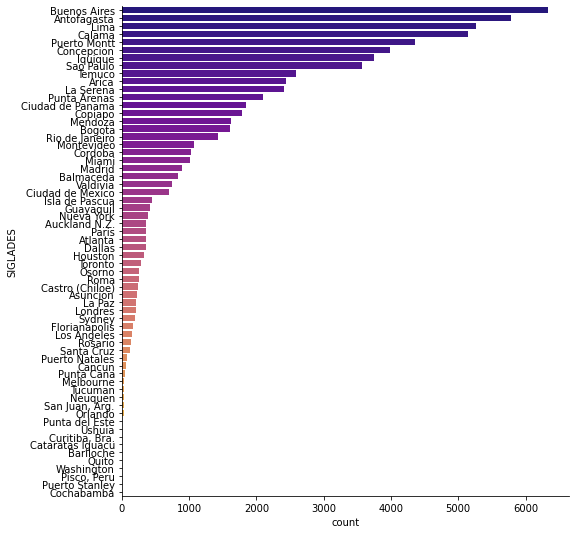

In [63]:
# DISTRIBUCION DESTINOS
sns.catplot(
    data=data,
    y='SIGLADES',
    kind='count',
    order = data.SIGLADES.value_counts().index,
    palette="plasma"

)
plt.gcf().set_size_inches(10, 8)


In [64]:
# FRECUENCIA RELATIVA DE LOS DESTINOS
data.SIGLADES.value_counts() / len(data) * 100

Buenos Aires      9.288039
Antofagasta       8.483125
Lima              7.726593
Calama            7.544791
Puerto Montt      6.388001
                    ...   
Quito             0.002932
Washington        0.001466
Pisco, Peru       0.001466
Puerto Stanley    0.001466
Cochabamba        0.001466
Name: SIGLADES, Length: 62, dtype: float64

In [65]:
# PORCENTAJE TIPOS DE VUELOS
temp = data.TIPOVUELO.value_counts(normalize=True)
temp = temp.reset_index(name='prop')
temp.rename(columns={'index':'tipo'}, inplace=True)

v_nac, v_inter = round(temp.prop[0],2), round(temp.prop[1],2)
print(f'% Vuelos Nacionales = {v_nac}')
print(f'% Vuelos Internacionales = {v_inter}')

% Vuelos Nacionales = 0.54
% Vuelos Internacionales = 0.46


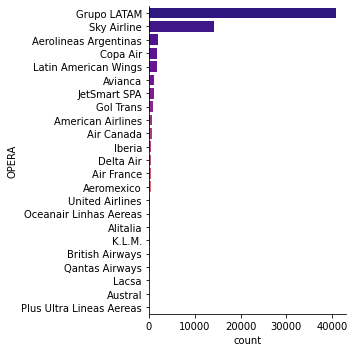

In [66]:
# DISTRIBUCION OPERACIONES POR LINEAS AEREAS 
sns.catplot(y="OPERA",
           # hue="class",
            kind="count",
            palette="plasma",
           # edgecolor=".6",
            order = data.OPERA.value_counts().index,
            data=data)

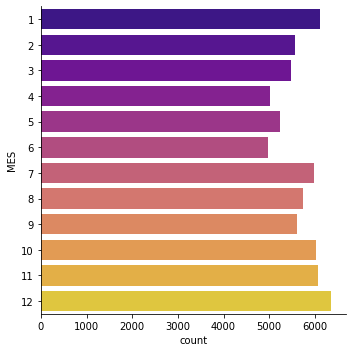

In [67]:
# DISTRIBUCION VUELOS POR MES
sns.catplot(
    data=data,
    y='MES',
    kind='count',
    palette='plasma'
)

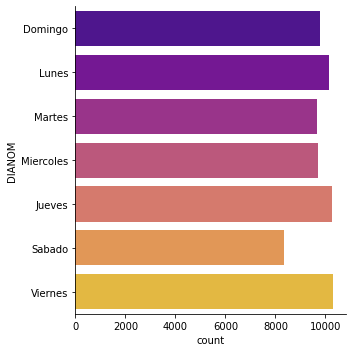

In [68]:
# DISTRIBUCION VUELOS POR DIA
sns.catplot(
    data=data,
    y='DIANOM',
    kind='count',
    palette='plasma')

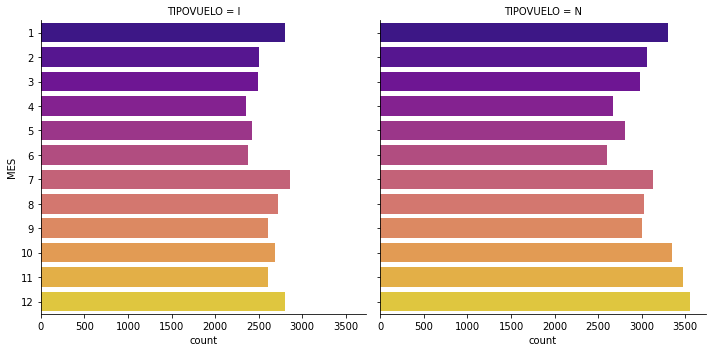

In [69]:
# COMPARACION DISTRIBUCION TIPO DE VUELO POR MES
sns.catplot(
    data=data,
    y='MES',
    kind='count',
    palette='plasma',
    col="TIPOVUELO"
)

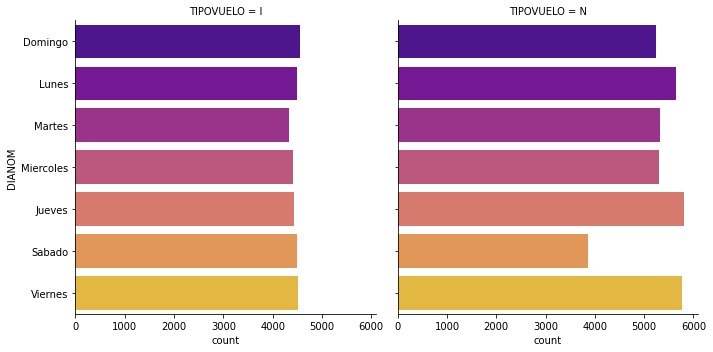

In [70]:
# COMPARACION DISTRIBUCION TIPO DE VUELO POR DIA
sns.catplot(
    data=data,
    y='DIANOM',
    kind='count',
    palette='plasma',
    col="TIPOVUELO"
)

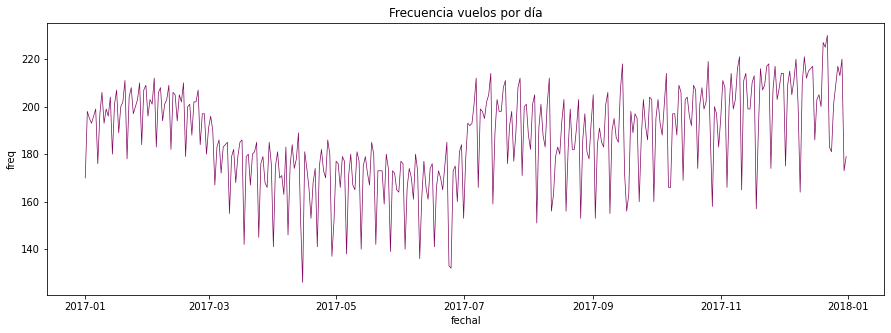

In [71]:
# DISTRIBUCION DE LOS VUELOS POR FECHA, AGRUPADO POR DIA
data['FechaPRO'] = pd.to_datetime(data['Fecha-I'])
data['FechaPRO'] = data.FechaPRO.dt.date
fechaspro = data.FechaPRO.value_counts().reset_index(name='freq')
fechaspro.rename(columns={'index':'fechaI'},inplace=True)
fechaspro.sort_values(by='fechaI',inplace=True)
sns.lineplot(x = 'fechaI', 
             y = 'freq',
             data = fechaspro, 
             color='#820661',
             linewidth=.7).set(title='Frecuencia vuelos por día')
plt.gcf().set_size_inches(15, 5)


###__Conclusiones Pregunta 1__:

Se realizo una exploracion de las principales variables que ayudan a describir el comportamiento de los vuelos en el aeropuerto con los datos entregados.

- En total se cuenta con 68.206 registros que corresponden a cada una de las operaciones desde el aeropuerto de Santiago de Chile en el año 2017.
- Los destinos únicos son 62, de los cuales el 26% corresponden a destinos nacionales, y el 74% restante son internacionales.
- Entre todos los destinos, el más frecuente es Buenos Aires con una 9.2% de los vuelos, le sigue Antofagasta con un 8.5%, Lima con un 7.8%, Calama con un 7.5% y Puerto Montt con 6.4%.
- Los vuelos nacionales corresponden al 54% de todas las operaciones, mientras que los vuelos internacionales son el 46%.
- Las lineas aéreas mas frecuentes son: 
-- Grupo LATAM
-- SKY Airlines
-- Aerolineas Argentinas
-- Copa Air
-- Latin America Wings
- Los Meses con mayor frecuencias de vuelos son: Enero, Julio y Diciembre.
- Los días con mayor frecuencia son: Lunes, Jueves y Viernes.
- Al ver la distribución de la frecuencia de los vuelos por día, se puede notar que al menos hay 4 secciones: 
desde enero a marzo, de marzo a julio, de julio a agosto y octubre a diciembre

##### __Sintesís__

El aeropuerto de Santiago de Chile tiene una cantidad mayor de destinos internacionales, sin embargo la frecuencia de estos vuelos en más baja que los nacionales. 

Al ver la alta frecuencia de vuelos nacionales, a ciudades como Antofagasta y Calama, donde se encuentran las mineras mas importantes del país, y que los días con mayor frecuencia son los lunes, jueves y viernes, es posible deducir que en su gran mayoria estan relacionados a viajes de trabajo.

También es posible notar una relación entre los meses con mayor frecuencia de vuelos, que son de temporadas de vacaciones, como diciembre, enero y julio.

### P2. Generar columnas nuevas

In [72]:
# TEMPORADA ALTA
# filtros 
filtros = [(data['Fecha-I']>'2017-12-15 00:00:00')|(data['Fecha-I']<'2017-04-01 00:00:00'),
           (data['Fecha-I']>'2017-07-15 00:00:00')&(data['Fecha-I']<'2017-07-31 00:00:00'),
          (data['Fecha-I']>'2017-09-11 00:00:00')&(data['Fecha-I']<'2017-09-30 00:00:00')]

valores = [1,1,1]
# columna nueva temporada alta
data['temporada_alta'] = np.select(filtros,valores)

In [73]:
# DIFERENCIA MINUTOS ENTRE PROGRAMADO Y DESPEGUE
data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])
data['Fecha-I'] = pd.to_datetime(data['Fecha-I'])
data['dif_minu'] = data['Fecha-O'] - data['Fecha-I']
# columna nueva diferencia minutos
data['dif_minu']=data['dif_minu'].dt.total_seconds() / 60

In [74]:
# ATRASO MAS DE 15 MINUTOS
filtros = [data.dif_minu > 15]
valores = [1]
# columna nueva atraso 15 minutos
data['atraso_15'] = np.select(filtros,valores)

In [75]:
# PERIODO DIA
# Creé nueva columna con el tiempo basado en columna Fecha-O.
# extraje solo el tiempo, para poder aplicar los filtros 
# converti esta columna en datetime por eso se agrego una misma fecha para todos los casos 1900-01-01 lo cual no afecta a la data
# solo sirve para operar con el tiempo.
data['horaO'] = data['Fecha-O'].dt.time
data['horaO'] = pd.to_datetime(data['horaO'], format='%H:%M:%S')
filtros = [(data.horaO >= '1900-01-01 05:00:00')&(data.horaO <= '1900-01-01 11:59:00'),
           (data.horaO >= '1900-01-01 12:00:00')&(data.horaO <= '1900-01-01 18:59:00'),
           (data.horaO >= '1900-01-01 19:00:00')&(data.horaO <= '1900-01-01 23:59:00'),
           (data.horaO >= '1900-01-01 00:00:00')&(data.horaO <= '1900-01-01 04:59:00')
           
]
valores = ['mañana','tarde','noche','noche']

data['periodo_dia'] = np.select(filtros,valores,default='sininfo')

In [76]:
# exportar las columnas nuevas
synthetic_features= data[['temporada_alta','dif_minu','atraso_15','periodo_dia']]
synthetic_features.to_csv('synthetic_features.csv')

###P3.TASA DE ATRASO

- Cada gráfico inluye una línea roja, la cual indica el umbral de atraso, marcando el minuto 15.


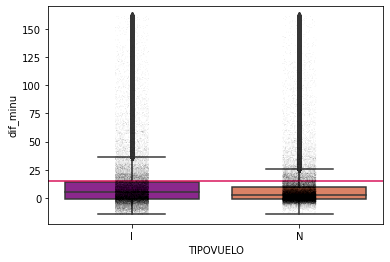

In [77]:
#TASA RETRASO POR TIPO DE VUELO
sns.boxplot(
    data=data,
    y='dif_minu',
    palette='plasma',
    x="TIPOVUELO"
).axhline(15, color="#d81159")
boxplot = sns.stripplot(x="TIPOVUELO", y='dif_minu', data=data, marker="o", alpha=0.2, color="black",size=.5)


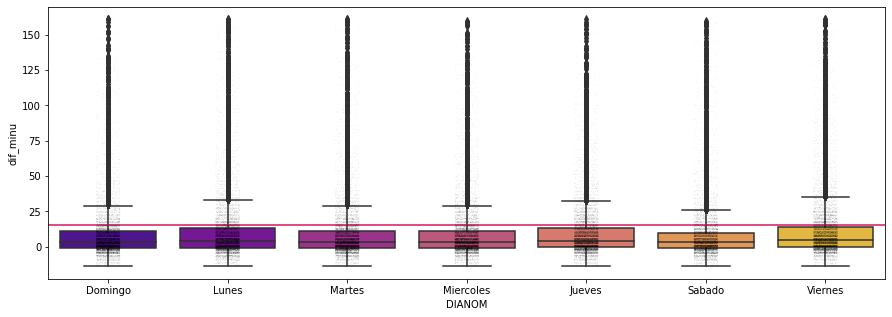

In [78]:
#TASA RETRASO POR DIAS SEMANA
sns.boxplot(
    data=data,
    y='dif_minu',
    palette='plasma',
    x="DIANOM"
).axhline(15, color="#d81159")
boxplot = sns.stripplot(x="DIANOM", y='dif_minu', data=data, marker="o", alpha=0.2, color="black",size=.5)

plt.gcf().set_size_inches(15, 5)

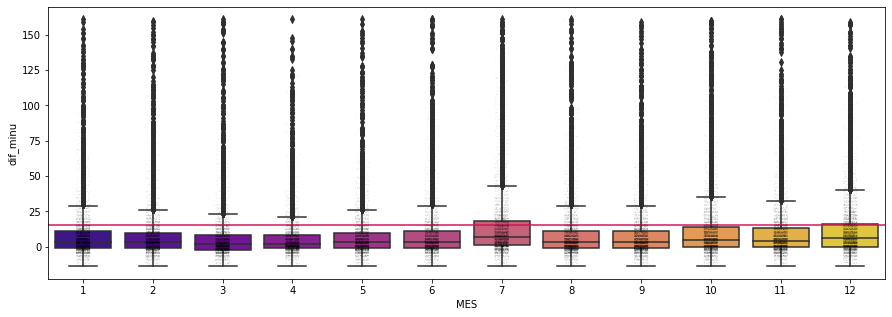

In [79]:
#TASA RETRASO POR MESES
boxplot= sns.boxplot(
    data=data,
    y='dif_minu',
    palette='plasma',
    x="MES"
).axhline(15, color="#d81159")
boxplot = sns.stripplot(x="MES", y='dif_minu', data=data, marker="o", alpha=0.2, color="black",size=.5)

plt.gcf().set_size_inches(15, 5)

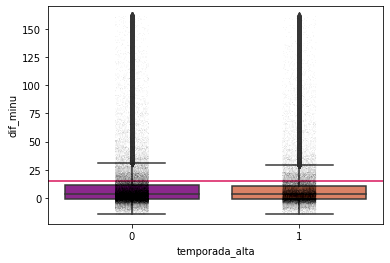

In [80]:
#TASA RETRASO POR TEMPORADA
boxplot = sns.boxplot(
    data=data,
    y='dif_minu',
    palette='plasma',
    x="temporada_alta"
).axhline(15, color="#d81159")
boxplot = sns.stripplot(x="temporada_alta", y='dif_minu', data=data, marker="o", alpha=0.2, color="black",size=.5)

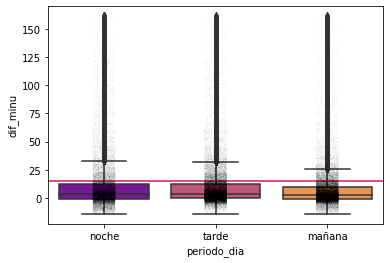

In [81]:
#TASA RETRASO POR PERIODO DEL DIA
boxplot = sns.boxplot(
    data=data,
    y='dif_minu',
    palette='plasma',
    x="periodo_dia"
).axhline(15, color="#d81159")
boxplot = sns.stripplot(x="periodo_dia", y='dif_minu', data=data, marker="o", alpha=0.2, color="black",size=.5)

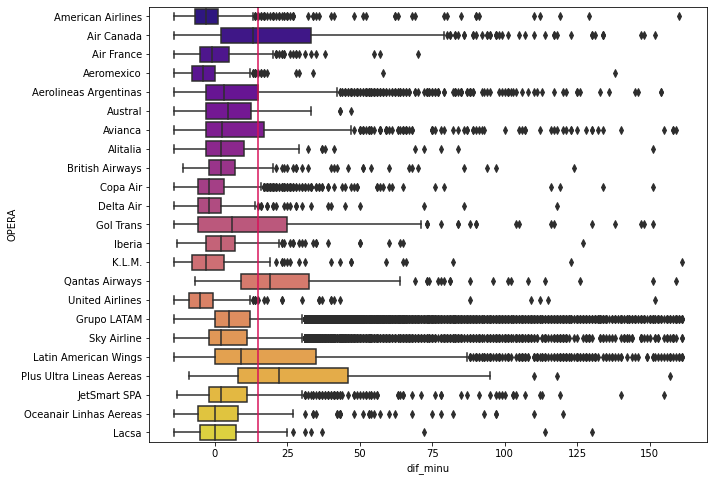

In [82]:
# TASA RETRASO POR AEROLINEA
sns.boxplot(
    data=data,
    x='dif_minu',
    palette='plasma',
    y="OPERA",
    orient='h'
).axvline(15,color="#d81159")
plt.gcf().set_size_inches(10, 8)


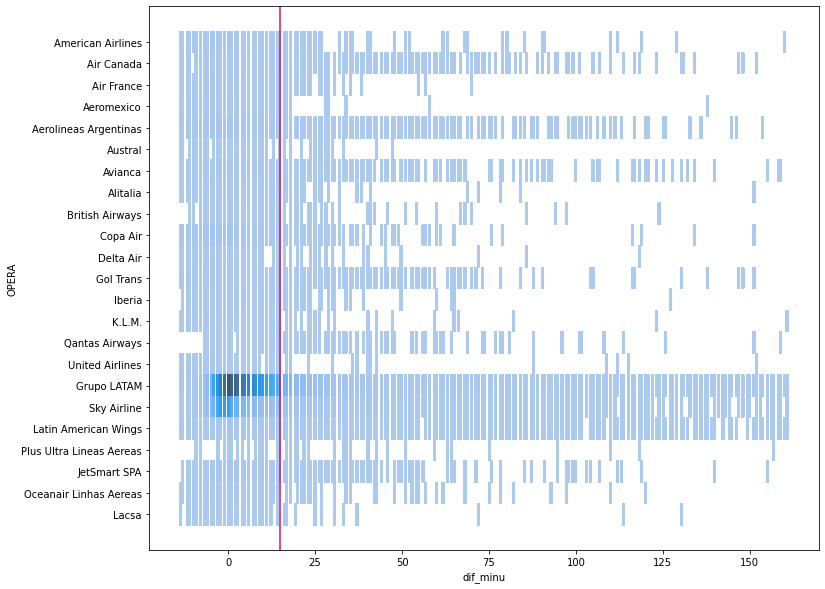

In [83]:
sns.histplot(
    data=data,
    x='dif_minu',
    palette='plasma',
    y="OPERA").axvline(15,color="#d81159")
plt.gcf().set_size_inches(12, 10)

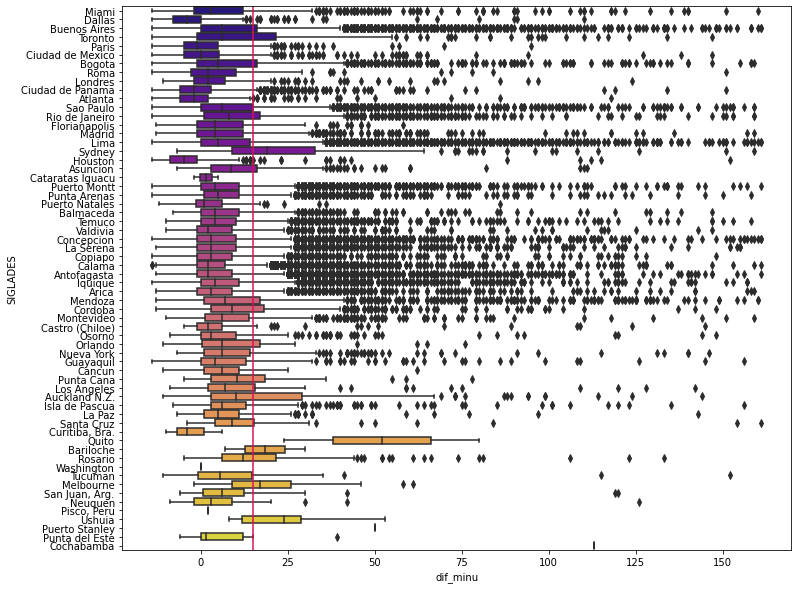

In [84]:
# DISTRIBUCION TASA RETRASO POR DESTINOS
sns.boxplot(
    data=data,
    x='dif_minu',
    palette='plasma',
    y="SIGLADES",
    orient='h'
).axvline(15,color="#d81159")
plt.gcf().set_size_inches(12, 10)


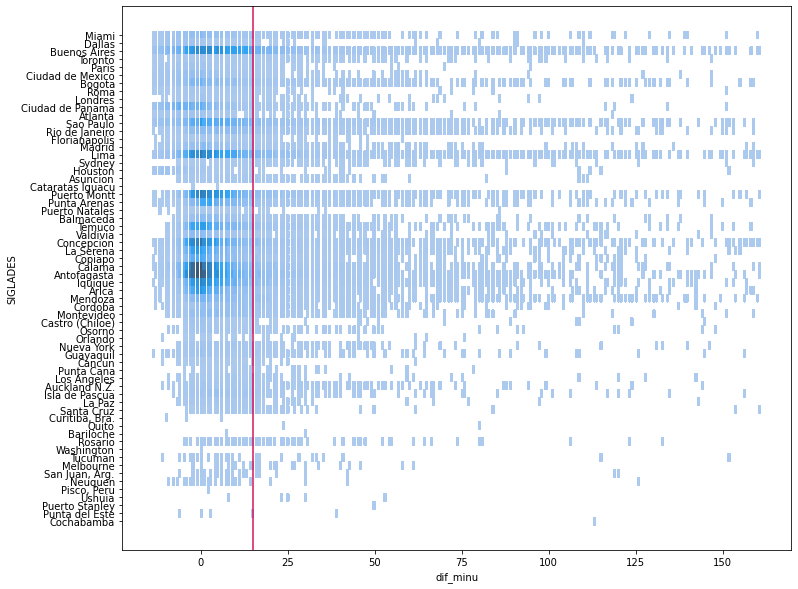

In [85]:
# DISTRIBUCION TASA RETRASO POR DESTINOS

sns.histplot(
    data=data,
    x='dif_minu',
    palette='plasma',
    y="SIGLADES").axvline(15,color="#d81159")
plt.gcf().set_size_inches(12, 10)


###__CONCLUSIONES P3__
- Al comparar los tipos de vuelos, los internacionales, son lo que tienen más atrasos.
- Al comparar los días de la semana, si bien en todos hay atrasos, es relevante que al menos el  75% de las operaciones cumple sus horas de salida. Sin embargo se aprecia que los días lunes, jueves y viernes, los atrasos tienden a tener un aumento, sin superar el 25% de las operaciones.
- En el caso de los Meses del año, los meses que aumentan los atrasos son, julio, octubre, noviembre y diciembre.
- Al comparar las temporadas, la distribución de los atrasos es muy similar para ambas, levemente más alta en temporada baja.
- Al comparar la tasa con los periodos del dia, se observa una mayor frecuencia de atrasos durante la tarde y noche.
- En el caso de las Aerolineas, se ve que la mayoria de éstas tiene el grueso de sus operaciones sin retrasos. Se observa que la aerolinea de Grupo LATAM, es la que mantiene una alta frecuencia de operaciones sin atrasos.
- Con respecto a los destinos, en forma general, practicamente todos los nacionales, mantienen la mayoría de sus operaciones sin retrasos. En el caso de los internacioles, también en su mayoría se mantienen bajo el umbral de atraso, sin embargo hay casos como los de Quito, que todas sus vuelos estuvieron atrasados, o algunos como Sidney, Aukland N.Z., Melbourne, Bariloche y Ushuia, tienden a tener muchos atrasos.
- En conclusión, las variables que más podrían estar afectando el atraso, serían: temporada, mes, dia de la semana, periodo del día, destino y aerolinea, aunque las dos últimas, al parecer serían las más determinantes, solo viendo sus distribuciones.


###__MODELO CLASIFICACION__

- Para responder esta parte, aplicaré solamente un modelo de clasificación, usando la libreria CatBoost entrenaré un CatBoostClassifier binario.
- Los __Features__ seran: 'DIA', 'MES', 'TIPOVUELO','OPERA', 'SIGLADES', 'temporada_alta' y 'periodo_dia'
- Y el __Label__ será: 'atraso_15'

In [86]:
!pip install CatBoost 

In [87]:
import random
from catboost import CatBoostClassifier
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics, preprocessing
from sklearn.model_selection import StratifiedKFold

In [88]:
# seleccion columnas para modelos
datamodelo = data[[ 'DIA', 'MES', 'OPERA', 'SIGLADES', 'temporada_alta','atraso_15','periodo_dia']]

In [89]:
# convertir en tipo string los valores de dias y meses
datamodelo['hora_progra'] =data['Fecha-I'].dt.hour
datamodelo['minutos_progra'] =data['Fecha-I'].dt.minute

In [90]:
# convertir en tipo string los valores de dias y meses
datamodelo['DIA'] = datamodelo['DIA'].astype('str')
datamodelo['MES'] = datamodelo['MES'].astype('str')

In [91]:
datamodelo.atraso_15.value_counts()
min_value = datamodelo.atraso_15.value_counts().min()
print(f'Cantidad de registros clase 1={min_value}')

Cantidad de registros clase 1=12614


In [92]:
# BALANCEAR CLASE ATRASO
# La clase 1 es la que tiene menos casos, por lo tanto, lo que hago es
# reducir la cantidad de casos 
c0 = datamodelo[datamodelo.atraso_15==0].sample(min_value)
c1 = datamodelo[datamodelo.atraso_15==1]
c0.shape, c1.shape

((12614, 9), (12614, 9))

In [93]:
datacomp=pd.concat([c0,c1])
datacomp.atraso_15.value_counts()

0    12614
1    12614
Name: atraso_15, dtype: int64

In [94]:
# DATAFRAME X CON COLUMNAS PREDICTORAS (FEATURES)
# DATAFRAME Y CON COLUMNA TARGET CLASE ATRASO
X = datacomp[['DIA', 'MES','OPERA', 'SIGLADES', 'temporada_alta','periodo_dia','hora_progra','minutos_progra']] 
Y = datacomp[['atraso_15']]

In [95]:
# dividir datos en entrenamiento y testeo
# entrenamiento con el 80%
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2,
                                                    random_state=7, 
                                                    shuffle=True, 
                                                    stratify = Y
                                                    )


In [96]:
# identificar variables categoricas para indicarle al modelo
# CatBoost se encarga de convertir las variables categoricas en numéricas

cat_feat = ['DIA','MES','OPERA','SIGLADES','periodo_dia']

In [97]:
x_train.shape[0], x_test.shape[0]

(20182, 5046)

In [98]:
x_train.head()

,DIA,MES,OPERA,SIGLADES,temporada_alta,periodo_dia,hora_progra,minutos_progra
67986,24,12,JetSmart SPA,Antofagasta,1,noche,20,11
7649,28,2,Sky Airline,Copiapo,1,mañana,7,20
14283,10,3,Grupo LATAM,Calama,1,mañana,8,35
4736,14,1,Grupo LATAM,Buenos Aires,1,mañana,8,0
5742,20,1,Grupo LATAM,Cordoba,1,tarde,17,40


In [99]:
y_train.atraso_15.value_counts()

0    10091
1    10091
Name: atraso_15, dtype: int64

In [100]:
y_test.atraso_15.value_counts()

0    2523
1    2523
Name: atraso_15, dtype: int64

In [101]:
# determinar nro de folds
n_fold = 3
folds = StratifiedKFold(n_splits=n_fold, shuffle=True)

#### Construcción Modelo

In [102]:
# parametros modelo
params = {
            'depth': 8,
            'iterations': 800,
           'l2_leaf_reg': 50,
            'learning_rate': 0.25
          }

In [103]:
# crear modelo clasificador, agregando parametros definidos anteriormente
model_n = CatBoostClassifier(**params,
                               loss_function='Logloss',
                               eval_metric='Accuracy',
                               task_type='CPU'
                               
)

In [104]:
#Entrenamiento del modelo
model_n.fit(x_train, y_train, eval_set=(x_test, y_test),
                              cat_features=cat_feat,
                              verbose_eval=300,
                              early_stopping_rounds=500,
                              use_best_model=True)

0:	learn: 0.6440888	test: 0.6575505	best: 0.6575505 (0)	total: 57.7ms	remaining: 46.1s
300:	learn: 0.7980379	test: 0.6952041	best: 0.7045184 (63)	total: 22.7s	remaining: 37.7s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.7045184304
bestIteration = 63

Shrink model to first 64 iterations.


In [113]:
#APLICAR MODELO A DATOS TESTEO
# EXTRAER ARRAY CON LAS CLASES PREDICHAS POR EL MODELO
y_pred = model_n.predict(x_test)
# EXTRAER ARRAY CON EL VALOR DE LA PROBABILIDAD DE CADA CLASE
y_prob = model_n.predict_proba(x_test)

#### Métricas Evaluación Modelo

In [106]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

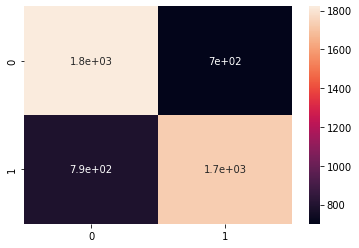

In [107]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [108]:
cm

array([[1822,  701],
       [ 790, 1733]])

In [109]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2523
           1       0.71      0.69      0.70      2523

    accuracy                           0.70      5046
   macro avg       0.70      0.70      0.70      5046
weighted avg       0.70      0.70      0.70      5046



In [110]:
# evaluate predictions
accuracy = round(accuracy_score(y_test, y_pred) * 100.0)
print(f"Accuracy: {accuracy}")

Accuracy: 70


In [111]:
from sklearn.metrics import roc_auc_score

y_pred = model_n.predict_proba(x_test)[:, 1]
valid_score = round(roc_auc_score(y_test, y_pred),2)
print(f'ROC-AUC score:{valid_score}')

ROC-AUC score:0.77


In [112]:
# Valor de la importancia de cada variable predictora
feature_importance = model_n.get_feature_importance()
feature_names = np.array(X.columns)
    
#
df_features={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(df_features).sort_values(by='feature_importance',ascending=False)
fi_df

,feature_names,feature_importance
1,MES,18.814652
6,hora_progra,18.291037
5,periodo_dia,17.553984
2,OPERA,14.129156
3,SIGLADES,11.809959
0,DIA,11.795500
7,minutos_progra,6.349217
4,temporada_alta,1.256495


###__Conclusiones P5__
- Lás métricas que utilice fueron la matriz de confusión, el accuracy, el reporte de clasificación y el AUC-ROC.
- El modelo llego a clasificar bien las clases, con un 70% de accuracy, y buen equilibrio entre las clases.
- Utilice Catboost, porque es un algoritmo muy sofisticado basado en el Gradient Boosting. Si bien hay otros algoritmos que se basan en gradient boost, éste en particular puede trabajr directamente con variables categóricas.

#### Probabilidad Atraso


In [131]:
# extraer el valor de la probabilidad de la clase 1 = atraso
proba_atraso = []

for x in range(len(y_prob)):
  proba_atraso.append(round(y_prob[x][1],2))

In [143]:
# lista con valores originales de las clases
clase_orig = list(y_test.atraso_15)
# lista con valores de clases predichas
clase_pred = list(y_pred)

In [159]:
# crear df con el resultado del testeo
result = pd.DataFrame({'clase_original':clase_orig, 'clase_pred':clase_pred, 'proba_atraso':proba_atraso})

In [160]:
# dataframe con info de los vuelos y su probabilidad de atraso
df_final = pd.concat([x_test.reset_index(),result],axis=1)

In [163]:
# probabilidad de atraso apra cada vuelo de los datos de testeo
df_final.drop('index', axis=1, inplace=True)

In [164]:
df_final

,DIA,MES,OPERA,SIGLADES,temporada_alta,periodo_dia,hora_progra,minutos_progra,clase_original,clase_pred,proba_atraso
0,16,3,Grupo LATAM,Buenos Aires,1,tarde,16,40,0,0,0.36
1,22,7,Grupo LATAM,Punta Arenas,1,mañana,6,45,1,0,0.29
2,12,3,Grupo LATAM,Valdivia,1,tarde,12,35,0,0,0.24
3,25,1,Grupo LATAM,Miami,1,noche,22,45,1,1,0.54
4,16,7,Grupo LATAM,Puerto Montt,1,mañana,8,20,1,1,0.68
...,...,...,...,...,...,...,...,...,...,...,...
5041,19,10,JetSmart SPA,Antofagasta,0,tarde,17,55,0,0,0.49
5042,14,3,Aerolineas Argentinas,Buenos Aires,1,mañana,9,20,0,0,0.40
5043,30,9,Sky Airline,Lima,0,tarde,15,10,1,1,0.55
5044,5,1,Grupo LATAM,Temuco,1,tarde,17,40,0,0,0.24
